In [31]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [2]:
dataFrame = pd.read_csv("booking.csv")

In [3]:
dataFrame.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
dataFrame.drop(["Booking_ID"],axis=1,inplace=True)

In [6]:
dataFrame.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
dataFrame.shape

(36285, 16)

Check unique values

In [8]:
dataFrame.nunique()

number of adults               5
number of children             6
number of weekend nights       8
number of week nights         18
type of meal                   4
car parking space              2
room type                      7
lead time                    352
market segment type            5
repeated                       2
P-C                            9
P-not-C                       59
average price               3930
special requests               6
date of reservation          553
booking status                 2
dtype: int64

Check if it contains null values

In [9]:
print(dataFrame.isnull().sum().sort_values(ascending=False))

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


DATA CLEANING & PREPROCESSING

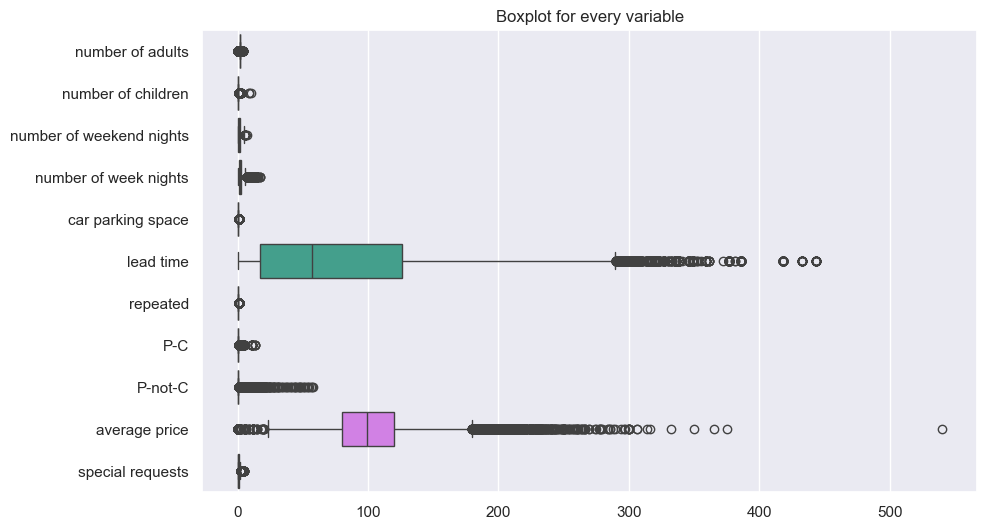

(36285, 16)


In [10]:
plt.figure(figsize=(10,6))
sbn.set(style="darkgrid")
sbn.boxplot(data=dataFrame, orient="h")
plt.title("Boxplot for every variable")
plt.show()
print(dataFrame.shape)

In [11]:
# Drop outliers

outlier_cols = ["lead time","average price"]
for col_name in outlier_cols:
    if(dataFrame[col_name].dtype in ["int64","float64"]):
        quartile1 = dataFrame[col_name].quantile(0.25)
        quartile3 = dataFrame[col_name].quantile(0.75)
        iqr = quartile3-quartile1
        upper_limit = quartile3 + 1.5 * iqr
        lower_limit = quartile1 - 1.5 * iqr
        dataFrame = dataFrame[
            (dataFrame[col_name] >= lower_limit) & (dataFrame[col_name] <= upper_limit)
        ]

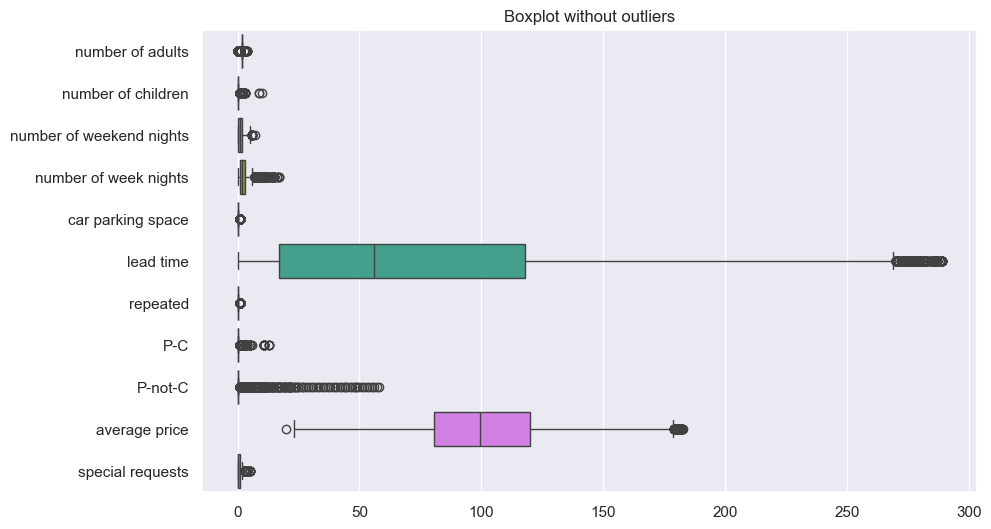

(33345, 16)


In [12]:
plt.figure(figsize=(10,6))
sbn.set(style="darkgrid")
booking_boxplot = sbn.boxplot(data=dataFrame, orient="h")
plt.title("Boxplot without outliers")
plt.show()
print(dataFrame.shape)

Encode categorical variables
canceled = 1
not_canceled = 0

In [13]:
dataFrame["booking status"] = dataFrame["booking status"].replace("Canceled",1)
dataFrame["booking status"] = dataFrame["booking status"].replace("Not_Canceled",0)
dataFrame.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,1
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,1


In [14]:
dataFrame = dataFrame[~dataFrame["date of reservation"].str.contains("-")]
dataFrame["date of reservation"] = pd.to_datetime(dataFrame["date of reservation"])

dataFrame["day"] = dataFrame["date of reservation"].dt.day
dataFrame["month"] = dataFrame["date of reservation"].dt.month
dataFrame["year"] = dataFrame["date of reservation"].dt.year

# drop the original column
dataFrame = dataFrame.drop(columns=["date of reservation"])

In [15]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          33312 non-null  int64  
 1   number of children        33312 non-null  int64  
 2   number of weekend nights  33312 non-null  int64  
 3   number of week nights     33312 non-null  int64  
 4   type of meal              33312 non-null  object 
 5   car parking space         33312 non-null  int64  
 6   room type                 33312 non-null  object 
 7   lead time                 33312 non-null  int64  
 8   market segment type       33312 non-null  object 
 9   repeated                  33312 non-null  int64  
 10  P-C                       33312 non-null  int64  
 11  P-not-C                   33312 non-null  int64  
 12  average price             33312 non-null  float64
 13  special requests          33312 non-null  int64  
 14  booking sta

In [16]:
dataFrame["average price"] = dataFrame["average price"].round().astype(int)

Apply one hot encoding of "object" datatype

In [17]:
object_columns = dataFrame.select_dtypes(include=["object"]).columns
dataFrame = pd.get_dummies(dataFrame, columns=object_columns)
dataFrame = dataFrame.replace({True:1,False:0})
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 0 to 36284
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   number of adults                   33312 non-null  int64
 1   number of children                 33312 non-null  int64
 2   number of weekend nights           33312 non-null  int64
 3   number of week nights              33312 non-null  int64
 4   car parking space                  33312 non-null  int64
 5   lead time                          33312 non-null  int64
 6   repeated                           33312 non-null  int64
 7   P-C                                33312 non-null  int64
 8   P-not-C                            33312 non-null  int64
 9   average price                      33312 non-null  int32
 10  special requests                   33312 non-null  int64
 11  booking status                     33312 non-null  int64
 12  day                    

In [18]:
dataFrame.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,3,0,5,0,0,0,107,...,0,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1,0,0,0,50,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,2,0,211,0,0,0,100,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,2,0,48,0,0,0,77,...,0,0,0,0,0,0,0,0,0,1


Visualize correlation between variables

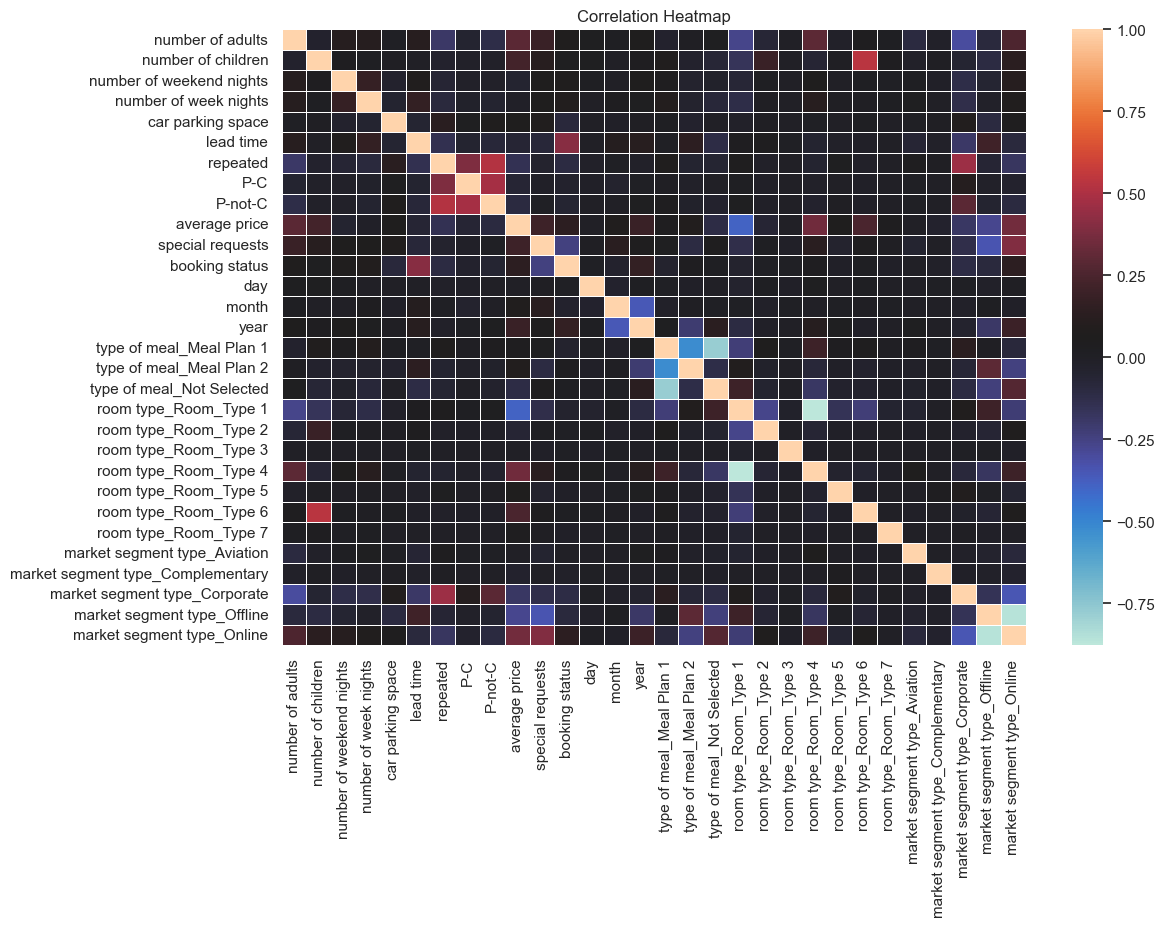

In [19]:
plt.figure(figsize=(12,8))
sbn.heatmap(dataFrame.corr(), cmap="icefire", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Feature Selection

In [20]:
features = dataFrame.drop(["booking status"], axis=1)
target = dataFrame["booking status"]
k_best = SelectKBest(score_func=f_classif, k=10)

x = k_best.fit_transform(features,target)
y = target

# get the indices of the selected features

selected_features_indices = k_best.get_support(indices=True)

# get the scores associated with each feature
feature_scores = k_best.scores_

# create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns,feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")


lead time: 6755.25
special requests: 2136.14
year: 952.07
market segment type_Online: 646.78
average price: 614.84
market segment type_Corporate: 414.32
repeated: 343.90
market segment type_Offline: 250.21
number of week nights: 248.88
car parking space: 216.60


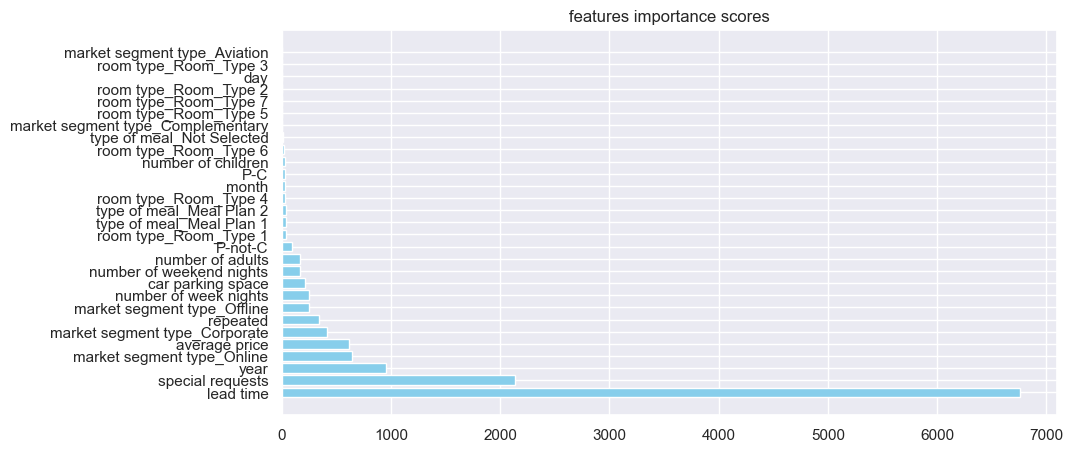

In [29]:
feature_names, feature_scores = zip(*sorted_feature_info[:])

# create bar chart

plt.figure(figsize=(10,5))
plt.barh(feature_names,feature_scores, color="skyblue")
plt.xlabel;("feature importance score")
plt.title("features importance scores")
plt.show()

In [30]:
selected_features_df = features.iloc[:, selected_features_indices]
selected_features_df.head()

,number of week nights,car parking space,lead time,repeated,average price,special requests,year,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,5,0,224,0,88,0,2015,0,1,0
1,3,0,5,0,107,1,2018,0,0,1
2,3,0,1,0,50,0,2018,0,0,1
3,2,0,211,0,100,1,2017,0,0,1
4,2,0,48,0,77,0,2018,0,0,1


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)

Models

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scores = {}

Logistic Regression

c:\Users\merta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\merta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

best parameters: {'C': 1, 'penalty': 'l2'}
best score: 0.7947392598888098
Accuracy: 0.80
---------------------------------------------------------
Confusion Matrix: 
[[4125  463]
 [ 851 1224]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4588
           1       0.73      0.59      0.65      2075

    accuracy                           0.80      6663
   macro avg       0.78      0.74      0.76      6663
weighted avg       0.80      0.80      0.80      6663



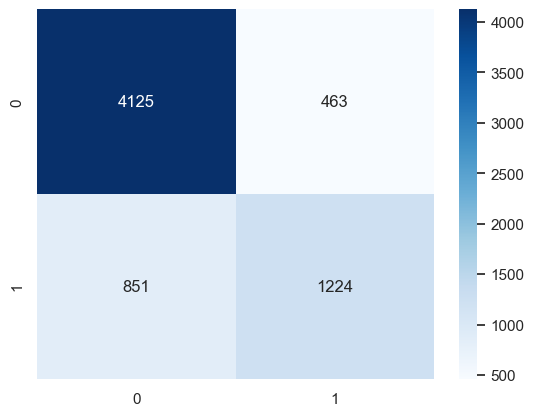

In [38]:
log_reg = LogisticRegression()

params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1","l2"]}

grid_search = GridSearchCV(log_reg, param_grid=params, cv=5)
grid_search.fit(x_train,y_train)
print(f"best parameters: {grid_search.best_params_}")
print(f"best score: {grid_search.best_score_}")

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Logistic Regression"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

KNN Classifier

best parameters: {'n_neighbors': 2}
best score: 0.8165410615637401
Accuracy: 0.83
---------------------------------------------------------
Confusion Matrix: 
[[4316  272]
 [ 835 1240]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4588
           1       0.82      0.60      0.69      2075

    accuracy                           0.83      6663
   macro avg       0.83      0.77      0.79      6663
weighted avg       0.83      0.83      0.83      6663



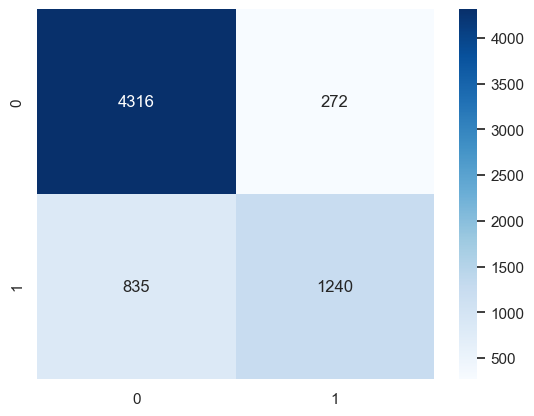

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {"n_neighbors": np.arange(1,10)}

grid_search = GridSearchCV(knn, param_grid=params, cv=5)
grid_search.fit(x_train,y_train)

print(f"best parameters: {grid_search.best_params_}")
print(f"best score: {grid_search.best_score_}")

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["KNN"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")




Decision Tree Clasifier

Best Parameters: {'criterion': 'entropy', 'max_depth': 15}
Best Score: 0.856392467566577
Accuracy: 0.87
---------------------------------------------------------
Confusion Matrix: 
[[4177  411]
 [ 483 1592]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4588
           1       0.79      0.77      0.78      2075

    accuracy                           0.87      6663
   macro avg       0.85      0.84      0.84      6663
weighted avg       0.86      0.87      0.87      6663



c:\Users\merta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\merta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\merta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\merta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

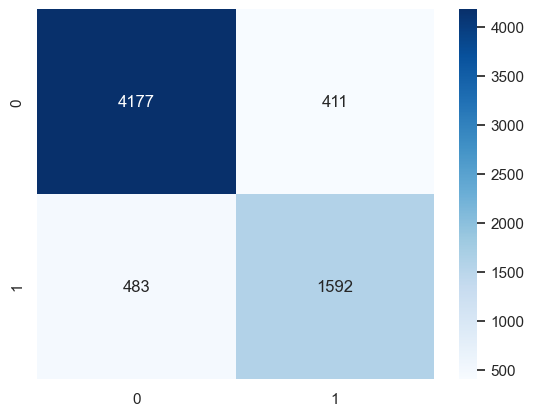

In [43]:
dt = DecisionTreeClassifier()

params = {"max_depth": np.arange(0, 30, 5), "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(dt, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Decision Tree"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Random Forest Classifier

Accuracy: 0.87
---------------------------------------------------------
Confusion Matrix: 
[[4205  383]
 [ 468 1607]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4588
           1       0.81      0.77      0.79      2075

    accuracy                           0.87      6663
   macro avg       0.85      0.85      0.85      6663
weighted avg       0.87      0.87      0.87      6663



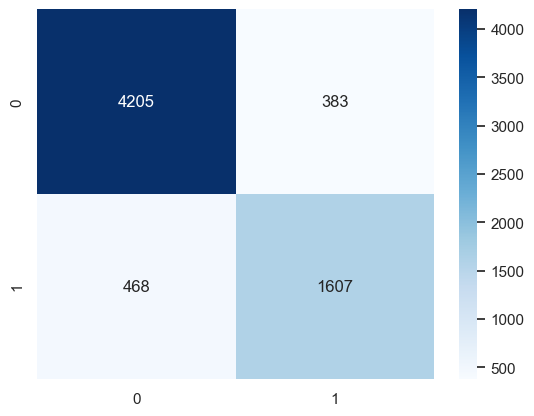

In [45]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Random Forest"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sbn.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Model Comparison

In [50]:
for model, score in scores.items():
    print(f"{model}:{score: .4f}")

Logistic Regression: 0.8028
KNN: 0.8339
Decision Tree: 0.8658
Random Forest: 0.8723
